In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import re
from dateutil import parser

from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import pandas as pd
from collections import Counter
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cleaned_data.csv')
df

,stars,cleaned_text,sentiment
0,1,"['lately', 'common', 'wait', 'hour', 'food', '...",negative
1,5,"['love', 'great', 'offer', 'good', 'selection'...",positive
2,1,"['disappointed', 'app', 'used', 'long', 'time'...",negative
3,2,"['fairly', 'easy', 'use', 'trying', 'find', 'h...",negative
4,4,"['like', 'fact', 'u', 'ca', 'get', 'refund', '...",positive
...,...,...,...
8892,5,"['food', 'good', 'delivery', 'took', 'forever'...",positive
8893,1,"['whenever', 'never', 'sent', 'correct', 'item...",negative
8894,1,"['delivery', 'driver', 'turn', 'incorrect', 'l...",negative
8895,5,"['great', 'deal', 'buddy', 'pizza', 'buy', 'on...",positive


## Data Cleaning

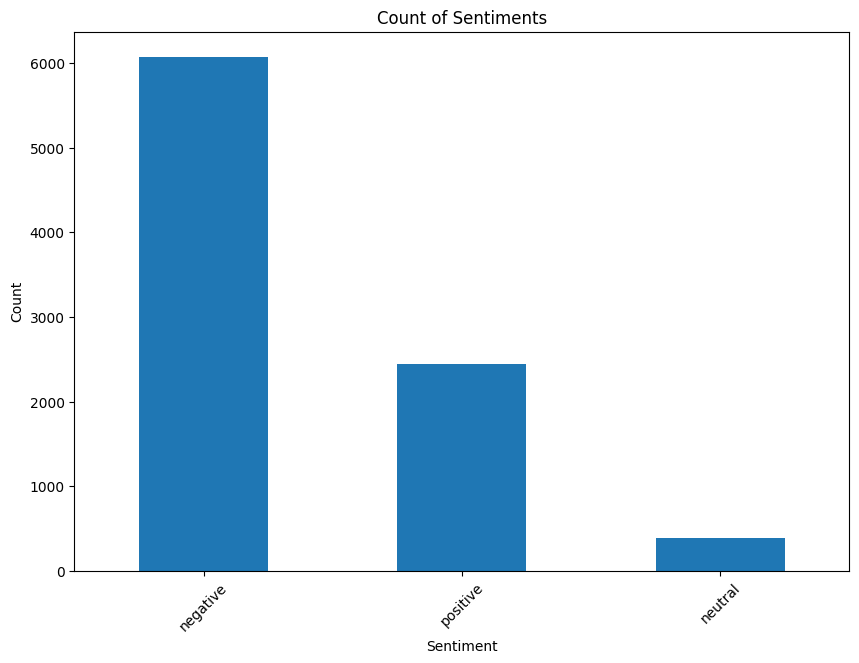

In [4]:
# Count the number of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot bar chart
sentiment_counts.plot(kind='bar', figsize=(10,7))

plt.title('Count of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [11]:
import ast
#  convert string representations of lists in 'cleaned_text' back to actual lists
df['cleaned_text_list'] = df['cleaned_text'].apply(ast.literal_eval)

# convert lists in 'cleaned_text_list' to strings
df['cleaned_text_str'] = df['cleaned_text_list'].apply(' '.join)

In [12]:
# initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [13]:
# convert 'cleaned_text_str' into TF-IDF vectors
X = vectorizer.fit_transform(df['cleaned_text_str'])

# use 'sentiment' as target
y = df['sentiment']

In [14]:
# Define oversampling strategy
over = RandomOverSampler(sampling_strategy='auto')

# Fit and apply the transform
X_over, y_over = over.fit_resample(X, y)

# Define undersampling strategy
under = RandomUnderSampler(sampling_strategy='auto')

# Fit and apply the transform
X_under, y_under = under.fit_resample(X, y)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Fit and apply the transform
X_under, y_under = under.fit_resample(X, y)

In [21]:
# split the oversampled data into training and test sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# initialize and train the Logistic Regression model on the oversampled data
lr_model_over = LogisticRegression()
lr_model_over.fit(X_train_over, y_train_over)

# make predictions on the test set
y_pred_over = lr_model_over.predict(X_test_over)

# print classification report for the oversampled data
print("Logistic Regression Metrics for Oversampled Data:")
print(classification_report(y_test_over, y_pred_over))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))

Logistic Regression Metrics for Oversampled Data:
              precision    recall  f1-score   support

    negative       0.95      0.90      0.93      1209
     neutral       0.92      0.99      0.96      1238
    positive       0.95      0.93      0.94      1194

    accuracy                           0.94      3641
   macro avg       0.94      0.94      0.94      3641
weighted avg       0.94      0.94      0.94      3641


Accuracy:  0.9412249382037902

Precision:  0.9421538909162167

Recall:  0.9412249382037902

F1 Score:  0.9408919518832837


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# split the undersampled data into training and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

# initialize and train the Logistic Regression model on the undersampled data
lr_model_under = LogisticRegression()
lr_model_under.fit(X_train_under, y_train_under)

# make predictions on the test set
y_pred_under = lr_model_under.predict(X_test_under)

# print classification report for the undersampled data
print("\nLogistic Regression Metrics for Undersampled Data:")
print(classification_report(y_test_under, y_pred_under))


Logistic Regression Metrics for Undersampled Data:
              precision    recall  f1-score   support

    negative       0.73      0.75      0.74        84
     neutral       0.57      0.61      0.59        77
    positive       0.74      0.66      0.70        73

    accuracy                           0.68       234
   macro avg       0.68      0.67      0.67       234
weighted avg       0.68      0.68      0.68       234



In [22]:
# make predictions on the test set for undersampled data
y_pred_under = lr_model_under.predict(X_test_under)

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_under, y_pred_under))

# print precision
print("\nPrecision: ", precision_score(y_test_under, y_pred_under, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_under, y_pred_under, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_under, y_pred_under, average='weighted'))


Accuracy:  0.6752136752136753

Precision:  0.6796794259281059

Recall:  0.6752136752136753

F1 Score:  0.6764056932695041


Here are some reasons why the above has happend

Loss of Information: When you undersample, you're essentially discarding potentially useful information. The randomly removed instances from the majority class could contain important information that the model needs to correctly classify new instances.

Overfitting: If the minority class is very small compared to the majority class, undersampling can lead to overfitting. The model trained on the undersampled dataset might not generalize well to new, unseen data.

Representation: The undersampled dataset may not adequately represent the majority class, especially if the class is not homogeneous. This can lead to a model that performs poorly on the majority class.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.82      1.00      0.90      1229
     neutral       0.00      0.00      0.00        80
    positive       0.96      0.59      0.73       471

    accuracy                           0.84      1780
   macro avg       0.59      0.53      0.54      1780
weighted avg       0.82      0.84      0.81      1780



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: U

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test, y_pred))

# print precision
print("\nPrecision: ", precision_score(y_test, y_pred, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test, y_pred, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test, y_pred, average='weighted'))


Accuracy:  0.8438202247191011

Precision:  0.8203547354525488

Recall:  0.8438202247191011

F1 Score:  0.8149343812490736


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.svm import LinearSVC

# initialize and train the SVM model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

# print classification report for SVM
print("\nSVM Metrics:")
print(classification_report(y_test, svm_y_pred))

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test, svm_y_pred))

# print precision
print("\nPrecision: ", precision_score(y_test, svm_y_pred, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test, svm_y_pred, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test, svm_y_pred, average='weighted'))


SVM Metrics:
              precision    recall  f1-score   support

    negative       0.92      0.96      0.94      1229
     neutral       0.44      0.05      0.09        80
    positive       0.85      0.88      0.86       471

    accuracy                           0.90      1780
   macro avg       0.74      0.63      0.63      1780
weighted avg       0.88      0.90      0.88      1780


Accuracy:  0.897191011235955

Precision:  0.8790535623987709

Recall:  0.897191011235955

F1 Score:  0.8806843565173719


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# initialize and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# make predictions on the test set
lr_y_pred = lr_model.predict(X_test)

# print classification report for Logistic Regression
print("Logistic Regression Metrics:")
print(classification_report(y_test, lr_y_pred))

KeyboardInterrupt: 

In [ ]:
# print accuracy
print("\nAccuracy: ", accuracy_score(y_test, lr_y_pred))

# print precision
print("\nPrecision: ", precision_score(y_test, lr_y_pred, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test, lr_y_pred, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test, lr_y_pred, average='weighted'))


Accuracy:  0.9039325842696629

Precision:  0.8638003662216415

Recall:  0.9039325842696629

F1 Score:  0.8832492999681
